<a href="https://colab.research.google.com/github/priyanka-moorthy/DevanagiriScriptRecognition/blob/master/Devanagiri_script_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Devanagiri Script Recognition**



*   Classifier - Random Forest
*   Validation Accuracy - 77.53





In [0]:
#upload zip folder containing DevanagiriHandWrittenCharacterDataset
from google.colab import files
uploaded_file = files.upload()


Saving DevanagariHandwrittenCharacterDataset.zip to DevanagariHandwrittenCharacterDataset.zip


In [0]:
#unzip to folder named images 
import zipfile
zip_ref = zipfile.ZipFile('DevanagariHandwrittenCharacterDataset.zip','r')
zip_ref.extractall('images')
zip_ref.close()


In [128]:
#import required packages
import os as os
import numpy as np
import matplotlib.pyplot as plt
import cv2
print("pacakges imported")



pacakges imported


In [0]:
#extract images from Train and Test folders 
features_img_array = []
features_label = []
training_data = []

#image dimensions
IMG_SIZE = 32

#load data from Train/Test folders respectively
def getData(x):
  curr_dir = 'images/DevanagariHandwrittenCharacterDataset/' + x
  subfolders = [folder.path for folder in os.scandir(curr_dir) if folder.is_dir() ]
  for dir in subfolders:
    directory = dir
    label = os.path.basename(dir) #for label
    #print(label)
                          
    for file in os.listdir(directory):
       if (file.endswith('.png')):
          img_array = cv2.imread(directory +"/"+ file, cv2.IMREAD_GRAYSCALE) #image converted to grayscale
          img_resized =  img_array.reshape(1024).astype('float32') #reshape image
          features_img_array.append(img_resized)
          features_label.append(label)
          if(str(x) == 'Train'):
            training_data.append([img_resized,label]) # stored together to shuffle

          
          
getData('Train')




In [144]:
# shuffle data before training
import random
random.shuffle(training_data)

X = [] #input image
y = [] #input label

for features, label in training_data:
        X.append(features)
        y.append(label)

#reshape
X =  np.array(X, 'float32')
print(X.shape)


(78200, 1024)


In [0]:
#split data for training and validation
from sklearn.model_selection import  train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)


In [0]:
#import packages required for model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [147]:
# fit classifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [148]:
# validation accuracy of classifier
predict_validation = clf.predict(X_val)
print("Obatained Validation Accuracy %: " + str(accuracy_score(y_val,predict_validation)*100))

Obatained Validation Accuracy %: 77.53196930946291


In [137]:
# validation confusion matrix
print("Obatained Validation Confusion Matrix: \n" + str(confusion_matrix(y_val,predict_validation)))

Obatained Validation Confusion Matrix: 
[[283   0   0 ...   0   0   0]
 [  0 334   4 ...   0   4   0]
 [  1  11 264 ...   1   1   0]
 ...
 [  0   1   6 ... 326   0   0]
 [  0   4   0 ...   1 309   0]
 [  0   0   2 ...   2   0 325]]


In [138]:
#predict value from validation
predict_validation[10]

'character_2_kha'

Predicted digit -> character_2_kha




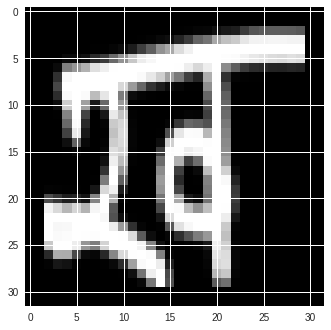

In [139]:
# display image of predicted value
print("Predicted digit -> " + str(predict_validation[10]))
print("\n")
plt.imshow(X_val[10].reshape((32,32)),cmap='gray')

In [0]:
#load test data

features_img_array = []
features_label = []


getData("Test")

In [141]:
#store images in numpy array
test_features = np.array(features_img_array, 'float32')
print(test_features.shape)

(13800, 1024)


Predicted digit_2




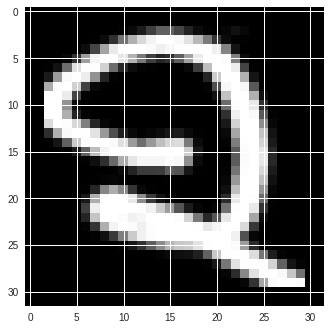

In [142]:
#predict label for given testing data
prediction_on_testdata = clf.predict(test_features)

print("Predicted " + str(prediction_on_testdata[1000]))
print("\n")
plt.imshow(test_features[1000].reshape((32,32)),cmap='gray')